This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Predicting house prices: A regression example

### The Boston Housing Price dataset

Outro tipo comum de problema de aprendizado de máquina é a **regressão**, que consiste em prever um valor contínuo em vez de um rótulo discreto:por exemplo, prever a temperatura amanhã, a partir de dados meteorológicos; ou prever o tempo que um projeto de software levará para ser concluído, dadas suas especificações.


**Importante**: Não confundir com o algoritmo de regressão logística (que é um algoritmo  de classificação)

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

**Loading the Boston housing dataset**

In [2]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [6]:
np.std(train_data)

144.39194712410696

In [7]:
np.mean(train_data)

69.79277358530084

In [9]:
train_data

(404, 13)

In [10]:
mean = train_data.mean(axis=0)
train_data -= mean

In [11]:
train_data

array([[ -2.51264057, -11.48019802,  -2.96443069, ...,   2.5240099 ,
         42.11683168,   5.97918317],
       [ -3.72334057,  71.01980198,  -9.07443069, ...,  -3.7759901 ,
         40.59683168,  -9.63081683],
       [  1.15310943, -11.48019802,   6.99556931, ...,   1.7240099 ,
         20.73683168,  -9.48081683],
       ...,
       [ -3.71045057,  23.51980198,  -5.04443069, ...,  -1.5759901 ,
          7.46683168,  -4.91081683],
       [ -1.59593057, -11.48019802,   8.47556931, ...,  -3.7759901 ,
        -92.83316832,   3.04918317],
       [ -3.73072057,  48.51980198,  -8.17443069, ...,  -2.8759901 ,
         21.91683168,  -8.36081683]])

In [13]:
train_data.std(axis=0)

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [14]:
std = train_data.std(axis=0)
train_data /= std

In [15]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [16]:
test_data

array([[1.80846e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.72500e+01, 2.90500e+01],
       [1.23290e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.94950e+02, 1.62100e+01],
       [5.49700e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.96900e+02, 9.74000e+00],
       ...,
       [1.83377e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.89610e+02, 1.92000e+00],
       [3.58090e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.91700e+02, 9.71000e+00],
       [2.92400e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.40160e+02, 9.81000e+00]])

In [17]:
test_data -= mean

In [18]:
test_data /= std

In [19]:
test_data

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

In [20]:
np.std(train_data)

0.9999999999999994

In [21]:
np.mean(train_data)

2.602301889250862e-15

### Building your model

**Model definition**

In [22]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

**Média do Erro Quadrático**

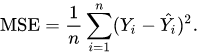

**Média do Erro Absoluto**

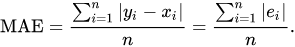

### Validating your approach using K-fold validation

*   Avalia seu modelo enquanto você ajusta seus parâmetros (como o número de épocas usado para treinamento);

*   Divide os dados disponíveis em partições K (normalmente K = 4 ou 5), instanciando K idênticas modelos e treinar cada um em partições K-1 enquanto avalia a partição restante.

*   A pontuação de validação para o modelo usado é então a média das pontuações de validação K obtidas.

**K-fold validation**

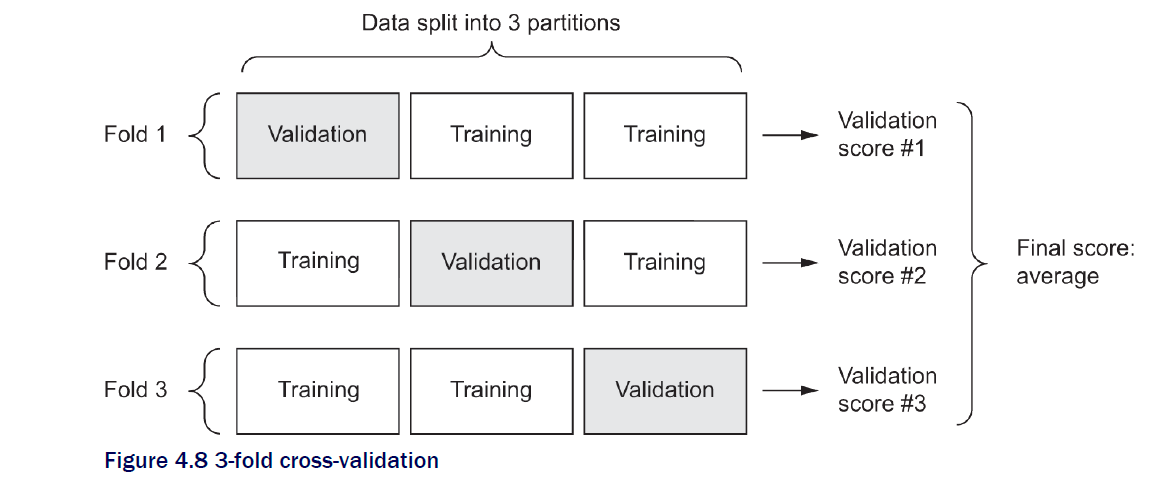

In [27]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 10
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [28]:
all_scores

[3.0649945735931396,
 3.2866599559783936,
 3.1543819904327393,
 3.9995038509368896]

In [29]:
np.mean(all_scores)

3.3763850927352905

**Saving the validation logs at each fold**

In [30]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [31]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

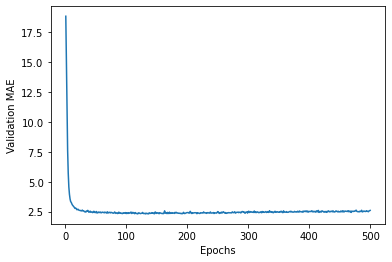

In [32]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

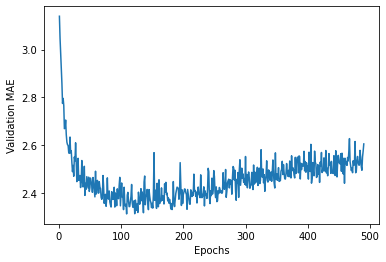

In [33]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [34]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 16.7474 - mae: 2.6401


In [35]:
test_mae_score

2.640104055404663

### Generating predictions on new data

In [36]:
predictions = model.predict(test_data)
predictions[0]

array([7.765903], dtype=float32)